# Image 처리 기초

## 1. 영상처리 시작하기

### 1.1 영상처리 및 응용이란 무엇인가?
### (1) 영상이란 무엇이며, 영상이 컴퓨터에 저장되는 방법

-  양자화의 개념 <br>
$ \ \ $ $\checkmark \ $  Analog data, 즉 연속적인 값을 Digital data로 근사하는 방법


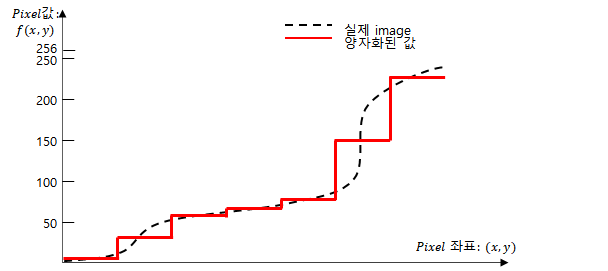

- 양자화된 이미지
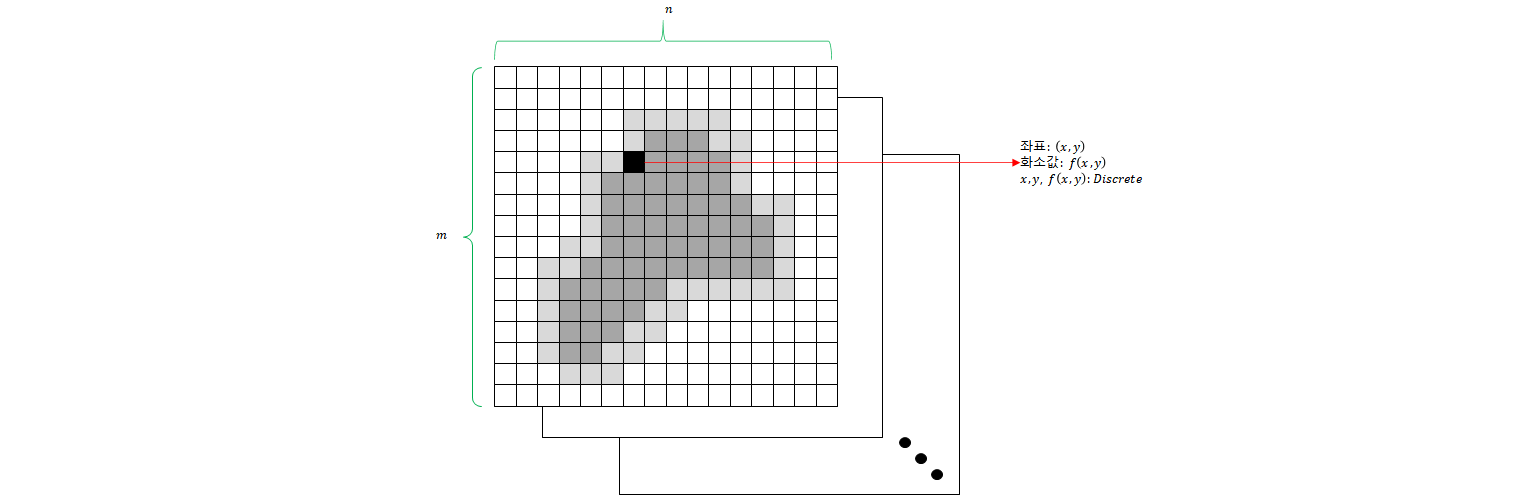

### (2) 영상처리란 무엇인가?
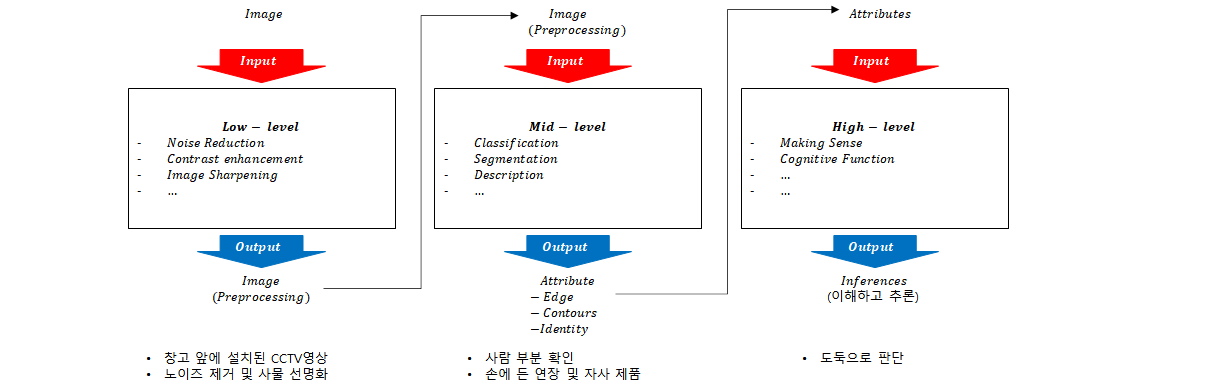

- 영상처리를 위한 구체적인 방법들
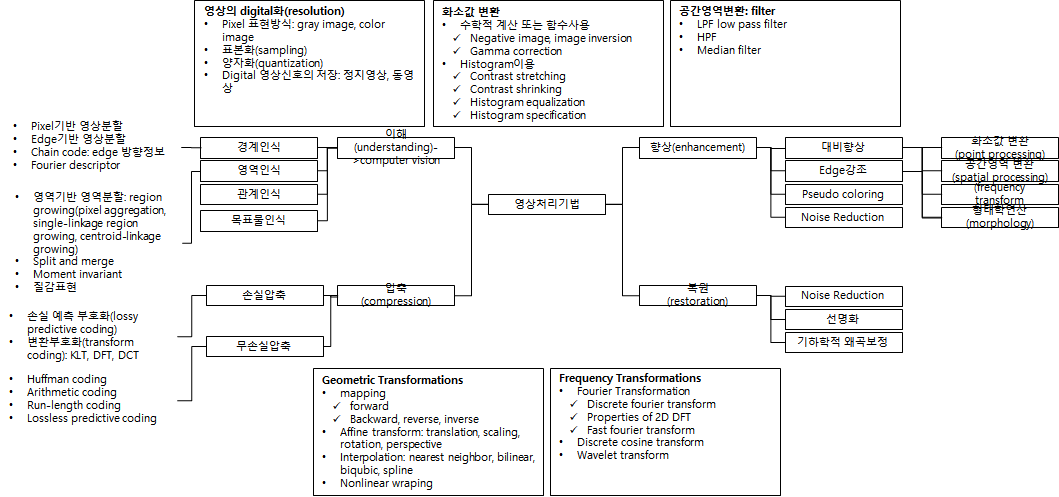

### 1.2   영상처리 파이프라인
### (1) 영상처리 파이프라인 
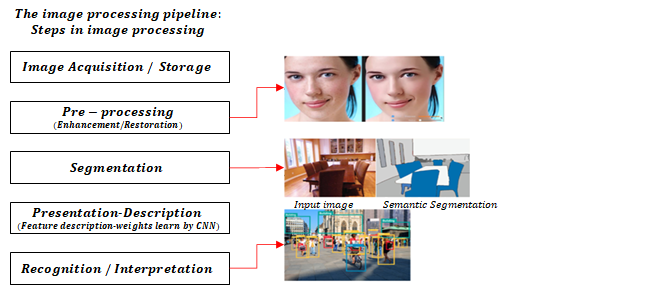

### (2) 영상처리 이미지의 예
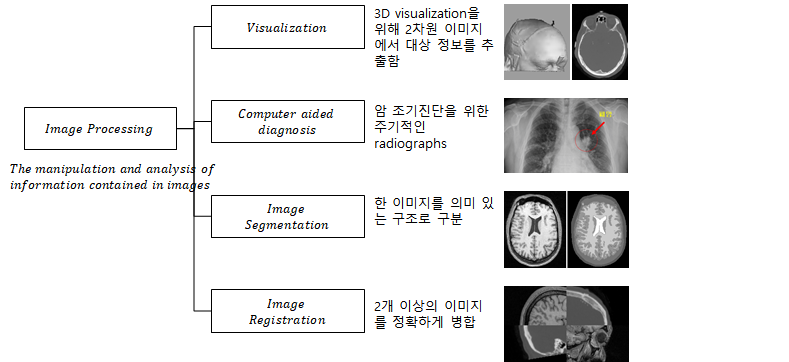

### (3) 영상처리에서의 파일형식
- 영상은 다양한 format을 이용하여 저장하고 있음
- 다양한 format을 쉽게 변환할 수 있는 변환함수를 사용할 수 있음<br> <br>
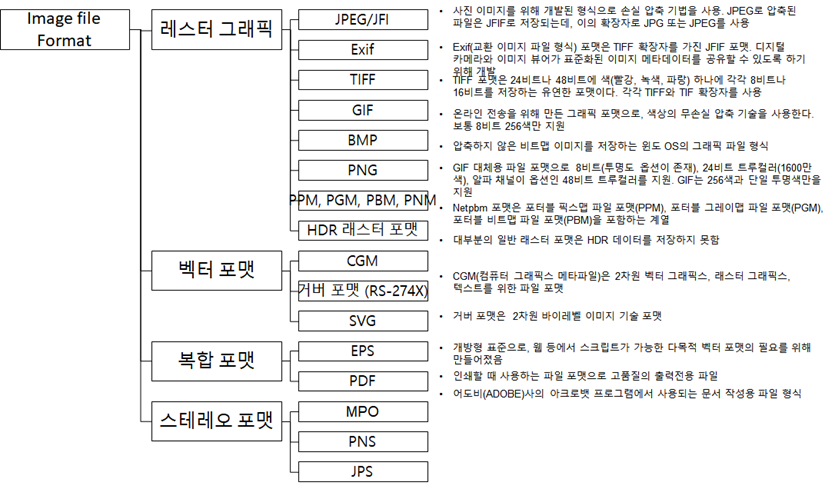

### (4) 영상처리 영상유형(mode)

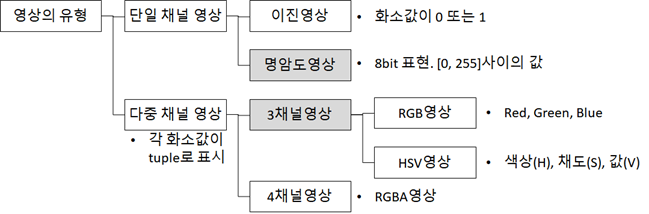

### (5) 영상처리에서의 색상 공간(채널)
#### 색공간(color space)<br>
  색 공간은 색 표시계(color system)를 3차원으로 표현한 공간 개념
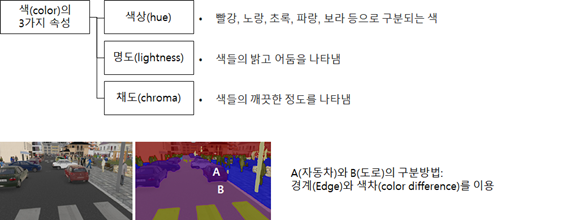

#### Color Space의 종류


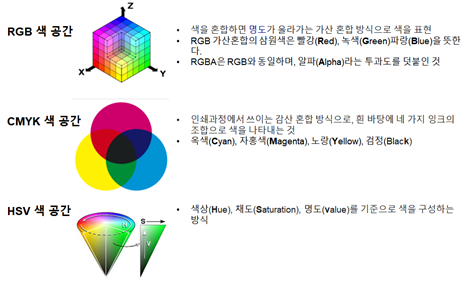


- 색차 계산(color difference)과 색공간: 컬러 영상 분할(color image segmentation)은 CIELAB 색 공간에서 색차 계산 결과를 이용하여 CIELAB 색 공간에서 영상 분할이 이루어져야 함<br>
- 컬러 영상 장비에서 다루는 RGB는 시각의 RGB가 아니고 단지 코드에 불과할 뿐 아니라 균등색 공간(uniform color space)도 아니기 때문에 공학적인 계산은 의미가 없을 뿐만 아니라 부정확하기 때문에 사용하면 오류를 발생

### 1.3  영상처리에서의 기하학적 변환(Geometric Transform)

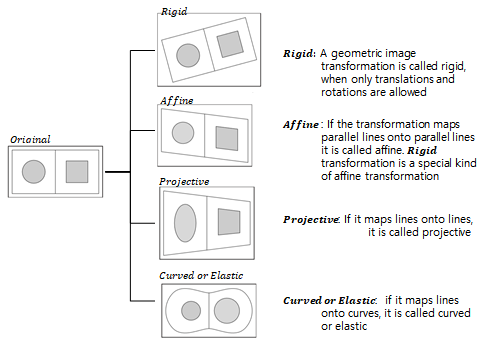<br>

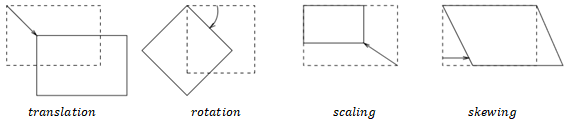

# 2. 이산 푸리에 변환(Fourier Transformation)

* 참고자료: (Image 처리) 01_01_01 (참고자료) Fourior Series(20190703).ppt
FFT with the scipy.fftpack module
* $Fourier \; Transformation$의 기본 아이디어는 영상이 2차원을 따라 $Sine$과 $Cosine$의 가중합으로 표현될 수 있는 $2D$ 함수 $f$로 생각할 수 있다는 것이다
* DFT를 사용하여 영상(공간/시간영역)의 명암도 pixel값 집합을 Fourier coefficient 집합(주파수영역)으로 전환할 수 있다.

## 2.1 Fourior Series를 이용한 Approximation의 예


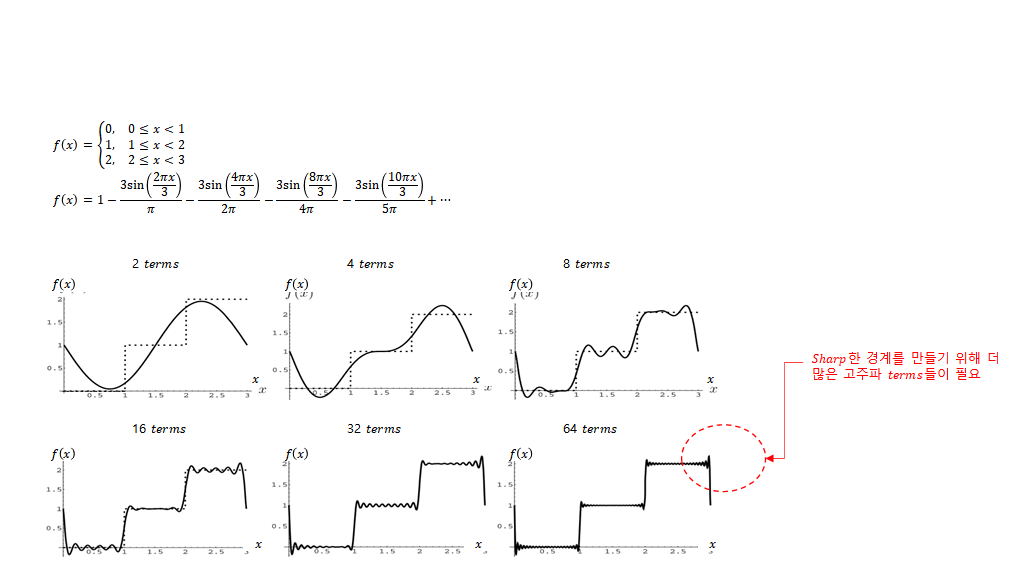

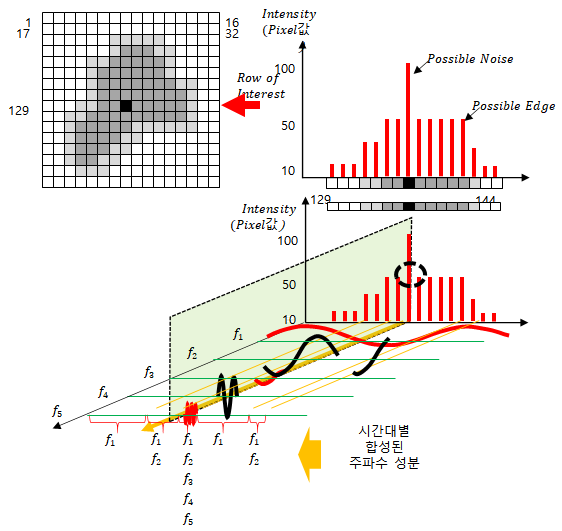

$\textbf{2D  Discrete  Fourier Transformation(DFT)}$<br>

$$
F(u, v) = \frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1}f(x, y)e^{-2\pi i(\frac{ux}{M}+\frac{vy}{N})}
$$

$\quad \quad \quad$ 여기서 $ u=0,1,...,M-1$, $v=0,1,...,N-1$<br>
$\quad \quad \quad$ $F(u, v)$는 frequency domain의 frequencies이고 $f(x, y)$는 time domain의 image임

$\textbf{2D Inverse  Discrete Fourier Transformation(IDFT)}$<br>

$$
f(x, y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1}F(u, v)e^{2\pi i(\frac{ux}{M}+\frac{vy}{N})}
$$ <br>
$\quad \quad \quad$ 여기서 $ x=0,1,...,M-1$, $y=0,1,...,N-1$

### (1) DFT가 필요한 이유는 무엇인가?

- 영상은 시간 Domain보다 주파수 Domain에서 더 잘 이해할 수 있음<br>
$ \ \ $ $\checkmark \ $ 저주파: 영상의 전체 평균 총 정보 레벨에 해당<br>
$ \ \ $ $\checkmark \ $ 고주파: Edge, Noise등 자세한 정보에 해당<br>


- 대부분의 영상은 소수의 DFT 계수들을 사용하여 표현할 수 있으며, 나머지 모든 높은 주파수들은 거의 무시할 수 있음<br>
$\Rightarrow$ 영상압축에서 특히, 영상을 재구성하는데 소수의 Fourier coefficient들만 필요하므로 Fourier-sparce-image의 경우 <br> $\quad \  $ 매우 유용함<br>
$ \ \ $ $\checkmark \ $ 따라서 해당 주파수만 저장되고. 다른 것들은 폐기되어 높은 압출율을 얻을 수 있음<br>
$ \ \ $ $\checkmark \ $ 주파수 영역에서의 DFT filtering은 공간영역에서의 filtering보다 매우 빠름

### (2) DFT를 계산하는 고속 푸리에 변환 알고리즘
* FFT(Fast Fourier Transform)은 nxn 영상에 대해 훨씬 느린 $O(N^2)$ 단순 계산보다 $O(Nlog_{2}N)$ 시간복잡도로 
 DFT를 훨씬 빨리 재귀적으로 계산하는 분할 및 정복 알고리즘임

#### scipy.fftpack module을 사용한 FFT
* scipy.fftpack module의 fft2()/ifft2() 함수를 사용
* 명암도 영상 rhino.jpg에 대해 FFT algorithm을 사용하여 FFT/IDFT를 계산

In [1]:
from PIL import Image
import scipy.fftpack as fp

from skimage.color import rgb2gray
from skimage.io import imread, imshow, show

import matplotlib.pyplot as plt
import numpy as np

##### Signal to Noise Ratio의 의미
- Noise 크기에 대한 Signal의 상대적 크기<br>
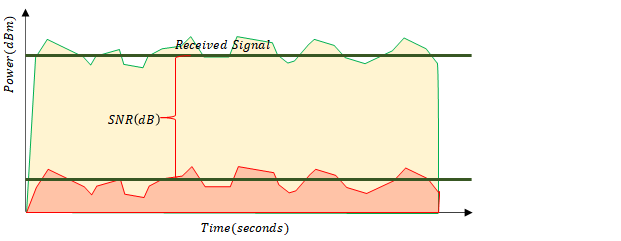
- 다음 cell에 사용되고 있는 signaltonoise$(SN)$ 모듈은 scipy에서 더이상 사용되지 않음<br>
- 따라서 아래의 함수로 정의하여 사용함<br>

In [2]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)   # sd==0이면 0을 반환하고 아니면 m/ds를 반환함

##### Domain의 변환($Time Domain \Longleftrightarrow  Frequency Domain$)
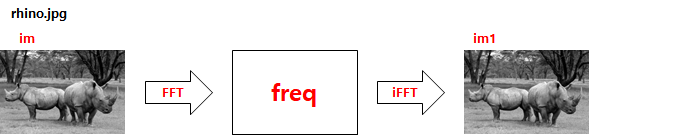

In [3]:
im = np.array(Image.open('c:/workspace/image/rhino.jpg').convert('L')) # grayscale image
snr = signaltonoise(im, axis=None)
print('SNR for the original image: {}'.format(np.round(snr,3)))
# SNR for the original image = 2.023722773801701

SNR for the original image: 2.032


In [4]:
#  Fourier transformation과  FFT과 역 Fourier transformation인 IFFT를 이용
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real   # 실수부분만을 반환,  fp.ifft2(freq).imag 는 허수 부분을 반환
snr = signaltonoise(im1, axis=None)
print('SNR for the image obtained after reconstruction: {}'.format(np.round(snr,3)))
# SNR for the image obtained after reconstruction = 2.0237227738013224

SNR for the image obtained after reconstruction: 2.032


In [5]:
assert(np.allclose(im, im1)) # assert는 뒤의 조건이 True가 아니면 AssertError를 반환

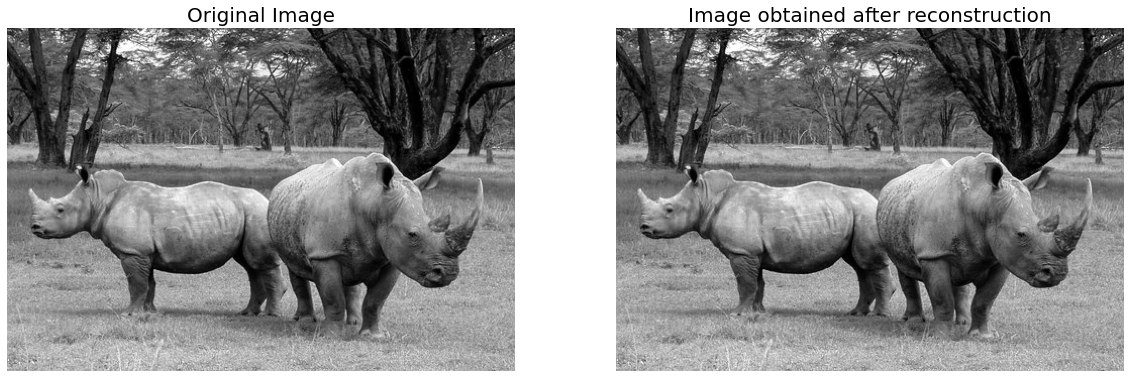

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.title('Original Image', size=20)
plt.subplot(122), plt.imshow(im1, cmap='gray'), plt.axis('off')
plt.title('Image obtained after reconstruction', size=20)
plt.show()

# 3.  합성곱(Convolution)의 이해
* Convolution은 2개의 영상(입력이미지와 filter)에서 작동<br>
$ \ \ $ $\checkmark \ $ 하나는 입력 영상이고 하나는 filter임<br>


* Convolution filtering은 영상의 공간 주파수 특성을 수정하는데 사용<br>


* 적절한 filter를 사용해 평활화, 선명화 및 엠보싱, edge detection과 같은 다양한 효과를 얻기 위해 사용<br>


* SciPy signal module의 convolve2d()함수는  상관관계 분석에 사용될 수 있음<br>
$ \ \ $ $\checkmark \ $ SciPy의 signal.convolve2d()에는 mode, boundary, fillvalue3가지 인수가 있음. mode를 보면<br>
$ \quad $ $\cdot \ $ mode = 'full': 출력이 입력 전체 이산 선형 콘볼루션인 기본 모드임<br>
$ \quad $ $\cdot \ $ mode = 'valid': edge화소를 무시하고 모든 이웃화소(zero padding을 필요로하지 않는 화소)에 대해서면 계산<br>
$ \quad $ $\cdot \ $ mode = 'same': 출력 영상의 크기와 입력영상의 크기가 동일

## 3.1 grayscale image에 convolution 적용

$ \ \ $ (i) 명암도 영상(흑백영상, gray scale image)인  cameraman.jpg 영상에서 <br>
$ \ \ $ (ii) Laplace filter와 convolution을 사용하여 edge를 detection하고 <br>
$ \ \ $ (iii) Blur filter를 사용하여 영상을 흐리게(Blurring)시키는 작업을 함

0.9921568627450982
(256, 256)


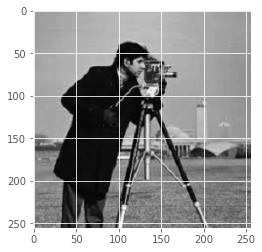

In [28]:
from scipy import ndimage, misc, signal, stats, fftpack 

im = rgb2gray(imread('c:/workspace/image/cameraman.jpg')).astype(float)
print(np.max(im))
print(im.shape)
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

- Blur Box filter<br>
- Edge를 탐지하기 위한 Laplace_kernel(filter)<br>
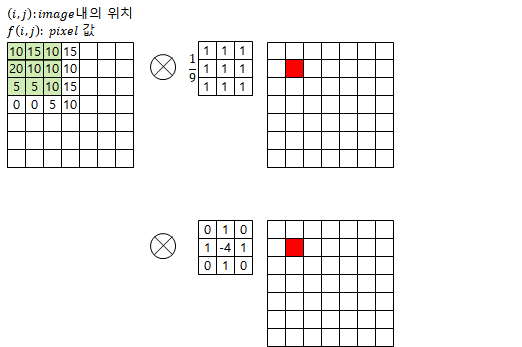

In [29]:
# numpy broascasting
np.ones((3,3))/9  

array([[0.11, 0.11, 0.11],
       [0.11, 0.11, 0.11],
       [0.11, 0.11, 0.11]])

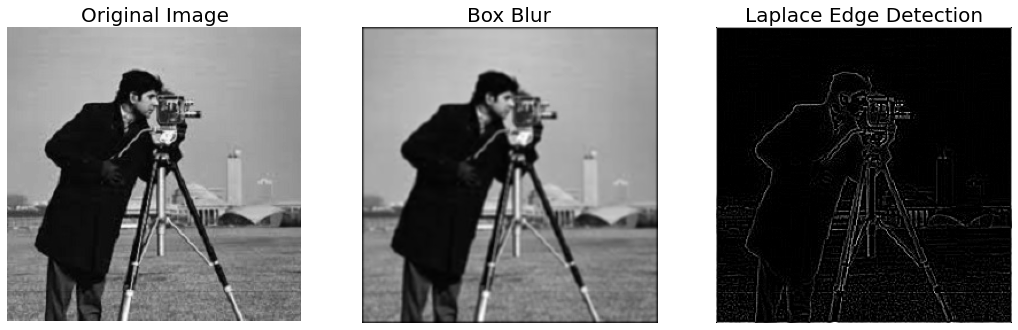

In [30]:
blur_box_kernel = np.ones((3,3)) / 9   # filter = kernel = window
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])

im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1) # np.clip(a, a_min, a_max, out=None)
                                                                     # a_min 보다 작은 수는 a_min으로 변환하고, 
                                                                     # a_max 보다 큰 수는 a_max으로 변환는 방법
#im_edges = signal.convolve2d(im, edge_laplace_kernel)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap=plt.cm.gray)
axes[0].set_title('Original Image', size=20)

axes[1].imshow(im_blurred, cmap=plt.cm.gray)
axes[1].set_title('Box Blur', size=20)

axes[2].imshow(im_edges, cmap=plt.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
plt.show()

### Color (RGB) Image에 Convolution 적용

* scipy의 convolve2d()를 사용하여 RGB영상을 선명하게 할 수 있음
* 각 channel영상(R, G, B)마다 convolution을 별도로 적용해야함
* tajmahal.jpg영상에 emboss filter(엠보싱 필터)와 schar edge detection 복소수 커널을 사용

In [31]:
from skimage.io import imread, imshow, show

im = imread('c:/workspace/image/tajmahal.jpg')/255 # scale each pixel value in [0,1]
print(np.max(im))
print(im.shape)

1.0
(1018, 1645, 3)


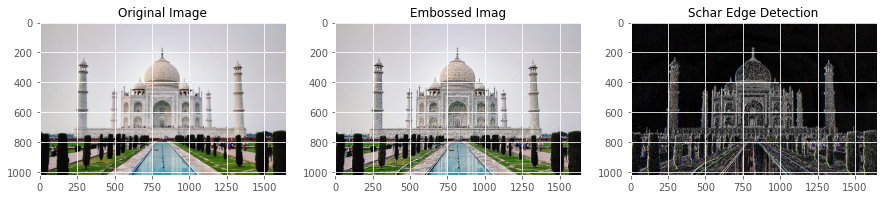

In [32]:
emboss_kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
edge_schar_kernel = np.array([[ -3-3j, 0-10j, +3 -3j], [-10+0j, 0+ 0j, +10+0j], [ -3+3j, 0+10j, +3 +3j]])

im_embossed = np.ones(im.shape)
im_edges = np.ones(im.shape)

for i in range(3):
    im_embossed[...,i] = np.clip(signal.convolve2d(im[...,i], emboss_kernel, mode='same', boundary="symm"),0,1)
    
for i in range(3):
    im_edges[:,:,i] = np.clip(np.real(signal.convolve2d(im[...,i], edge_schar_kernel, mode='same', boundary="symm")),0,1)

plt.figure(figsize=(15,16))

plt.subplot(131), plt.imshow(im), plt.title('Original Image', size=12)
plt.subplot(132), plt.imshow(im_embossed), plt.title('Embossed Imag', size=12)
plt.subplot(133), plt.imshow(im_edges), plt.title('Schar Edge Detection', size=12)
plt.show()

### Convolution with SciPy ndimage.convolve

255.0


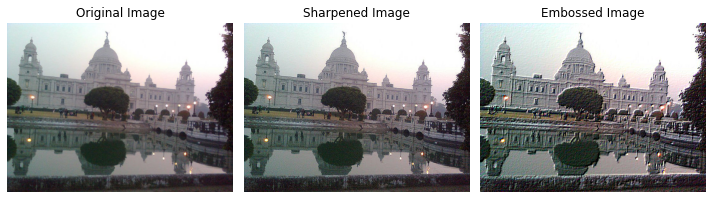

In [33]:
im = imread('c:/workspace/image/victoria_memorial.png').astype(np.float) # read as float

print(np.max(im))

sharpen_kernel = np.array([0, -1, 0, -1, 5, -1, 0, -1, 0]).reshape((3, 3, 1))

emboss_kernel = np.array(np.array([[-2,-1,0],[-1,1,1],[0,1,2]])).reshape((3, 3, 1))

im_sharp = ndimage.convolve(im, sharpen_kernel, mode='nearest')
im_sharp = np.clip(im_sharp, 0, 255).astype(np.uint8) # clip (0 to 255) and convert to unsigned int

im_emboss = ndimage.convolve(im, emboss_kernel, mode='nearest')
im_emboss = np.clip(im_emboss, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,16))
plt.subplot(131), plt.imshow(im.astype(np.uint8)), plt.axis('off')
plt.title('Original Image', size=12)
plt.subplot(132), plt.imshow(im_sharp), plt.axis('off')
plt.title('Sharpened Image', size=12)
plt.subplot(133), plt.imshow(im_emboss), plt.axis('off')
plt.title('Embossed Image', size=12)
plt.tight_layout()
plt.show()

# 4. Convolution과 주파수 영역 필터링
* Convolution에 대한 이해
* Convolution 정리의 개념을 이용하여 주파수 영역에서 Convolution이 더 빨리 수행될 수 있는 방법을 이해
* Convolution과 Correlation의 차이점
* 교차 상관관계(Cross Correlation)을 사용하여 Template영상으로 영상의 특정 pattern위치 찾기
* 주파수영역에서 Filtering기술(Box kernel, gaussian kernel등 )을 설명
* filter을 이용한 영상 Noise 제거방법

## 4.1 Convolution 연산
- filter가 가지는 특징을 추출하는데 사용
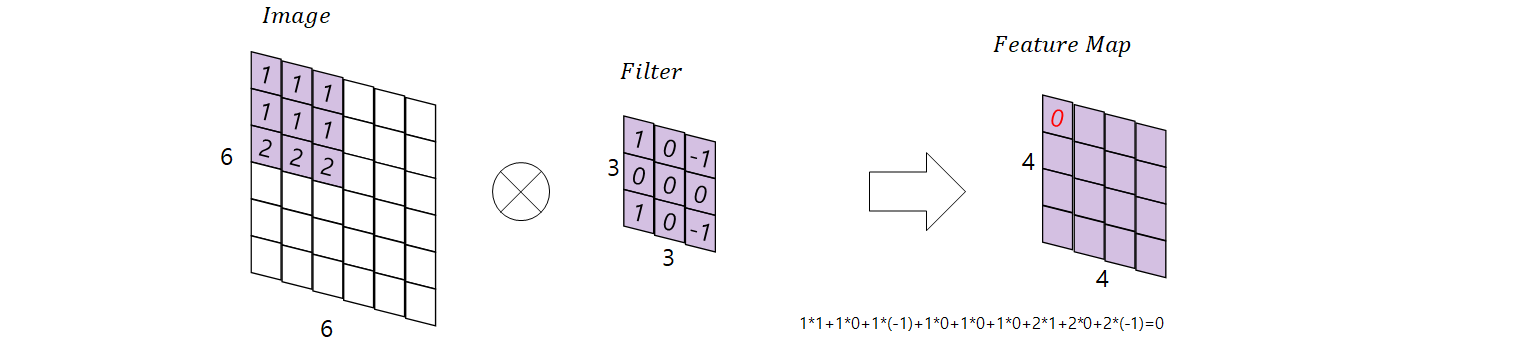

- 쥐의 특정 부위 특징을 추출
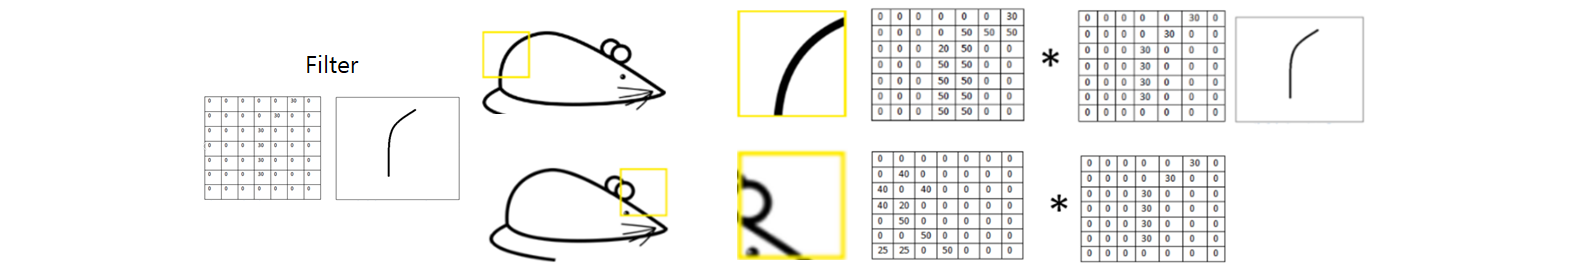

## 4.2 Convolution 정리 및 주파수 영역 Gaussian Blur

### (1) 컨볼루션 정리의 적용
* Convolution Theorem은 영상영역에서의 Convolution operation이 주파수영역에서는 단순한 곱셈과 동일하다는 것임<br>

$$
f(x, y) \otimes h(x, y) \Longleftrightarrow F(u, v) \times H(u, v)
$$

$\quad $ 여기서 $f(x, y), h(x, y)$는 영상domain(Time domain)의 image이고 $F(u, v), H(u, v)$는 주파수 domain으로 변환한 결과값<br><br>
* 다음 그림은 왜 Frequency Domain에서 계산하는 이유를  보여줌


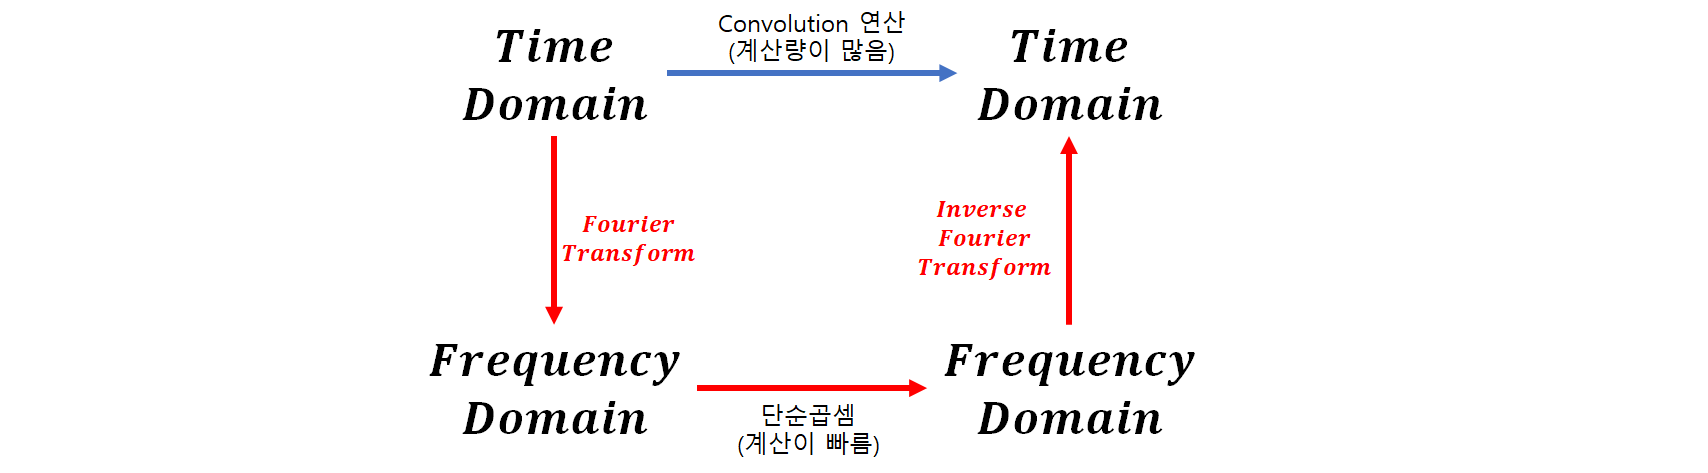


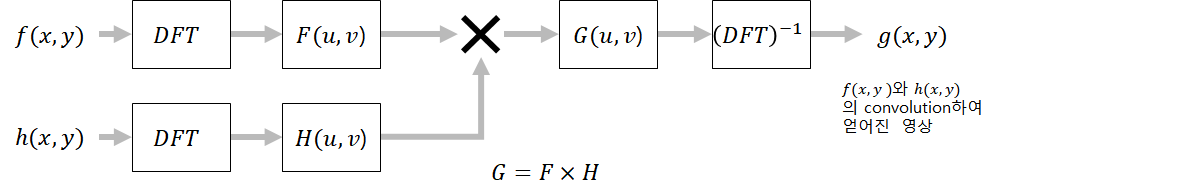

$ \ \ $ $\checkmark \ $ 원본영상 $f$와 커널(필터)$h$를 입력으로 가짐<br>
$ \ \ $ $\checkmark \ $ 먼저 $f$와 $h$를 모두 DFT로 주파수 영역으로 변환한 후<br>
$ \ \ $ $\checkmark \ $ convolution정리를 적용<br>
$ \ \ $ $\checkmark \ $ convolution정리를 적용하는 방법은 conponent-wise 곱셈인데 이것이 주파수 영역에서 얻은 컴볼루션된 영상임<br>
$ \ \ $ $\checkmark \ $ 주파수 영역에서 convolution된 영상을 IDFT를 적용하여 Time domain의 영상으로 변환람

* Import libraries

In [34]:
#% matplotlib inline 
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale

import matplotlib.pyplot as plt
import numpy as np
import numpy.fft

import timeit

In [14]:
# signaltonoise 모듈은 scipy에서 더이상 사용되지 않음
# 따라서 아래의 함수로 정의하여 사용함

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

##### numpy fft를 사용한 주파수 영역 가우시안 블러 필터
* 참고: Chapter3  참고자료.ipynb, scipy.signal.gaussian(M, std)

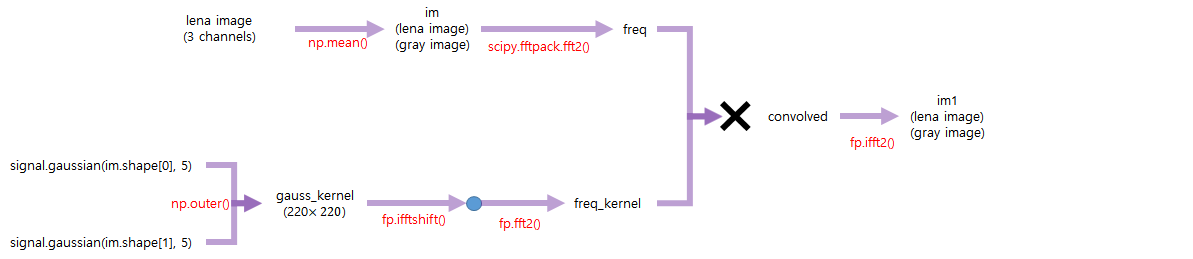

In [35]:
plt.figure(figsize=(6,6))
#plt.gray() # show the filtered result in grayscale

# lena image (rows, columns, channel)
#            (0    ,      1,       2)
im = np.mean(imread('c:/workspace/image/lena.jpg'), axis=2)  # 3channel의 평균 => gray image로 변환
im.shape  # tuple 2차원 data  (220, 220)

(512, 512)

<Figure size 432x432 with 0 Axes>

In [36]:
#print('im.shape[0] = {}'.format(im.shape[0]))
#print('signal.gaussian(im.shape[0], 5) = {}'.format(
#                     signal.gaussian(im.shape[0], 5)))    # im.shape[0]=220이라는 것임

gauss_kernel = np.outer(signal.gaussian(im.shape[0], 55),   # np.outer()는 외적
                        signal.gaussian(im.shape[1], 55))

np.set_printoptions(precision=2)  # np.array()의 출력 자릿수 지정함수
print('gauss_kernel =\n{}\ngauss_kernel.shape = {}'.
      format(gauss_kernel, gauss_kernel.shape))

print(gauss_kernel[100, 100])
print(gauss_kernel[250, 250])
print(gauss_kernel[256, 256])

gauss_kernel =
[[4.24e-10 4.62e-10 5.02e-10 ... 5.02e-10 4.62e-10 4.24e-10]
 [4.62e-10 5.02e-10 5.46e-10 ... 5.46e-10 5.02e-10 4.62e-10]
 [5.02e-10 5.46e-10 5.94e-10 ... 5.94e-10 5.46e-10 5.02e-10]
 ...
 [5.02e-10 5.46e-10 5.94e-10 ... 5.94e-10 5.46e-10 5.02e-10]
 [4.62e-10 5.02e-10 5.46e-10 ... 5.46e-10 5.02e-10 4.62e-10]
 [4.24e-10 4.62e-10 5.02e-10 ... 5.02e-10 4.62e-10 4.24e-10]]
gauss_kernel.shape = (512, 512)
0.0003376600038949287
0.9900498337491681
0.9999173587868739


<ipython-input-37-ef439a4d5be1>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(2,3,4), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
<ipython-input-37-ef439a4d5be1>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(2,3,5), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
<ipython-input-37-ef439a4d5be1>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(2,3,6), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))


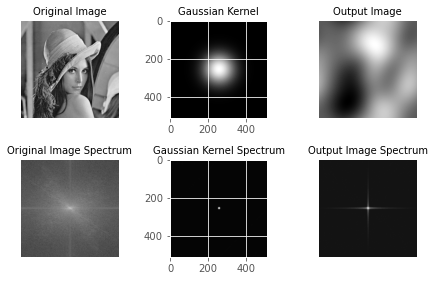

In [37]:
freq = fp.fft2(im)

assert(freq.shape == gauss_kernel.shape)

freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))

convolved = freq*freq_kernel # by the convolution theorem, 
                             # simply multiply in the frequency domain
im1 = fp.ifft2(convolved).real  # 실수 부분만 반환
plt.subplot(2,3,1), plt.imshow(im), plt.title('Original Image',
                                    size=10), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(gauss_kernel), plt.title('Gaussian Kernel', 
                                                        size=10)
plt.subplot(2,3,3), plt.imshow(im1) # the imaginary part is an artifact
plt.title('Output Image', size=10), plt.axis('off')

plt.subplot(2,3,4), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
plt.title('Original Image Spectrum', size=10), plt.axis('off')

plt.subplot(2,3,5), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
plt.title('Gaussian Kernel Spectrum', size=10)

plt.subplot(2,3,6), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
plt.title('Output Image Spectrum', size=10), plt.axis('off')
#plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.tight_layout()
plt.show()

##### 주파수 영역에서  Gaussian kernel
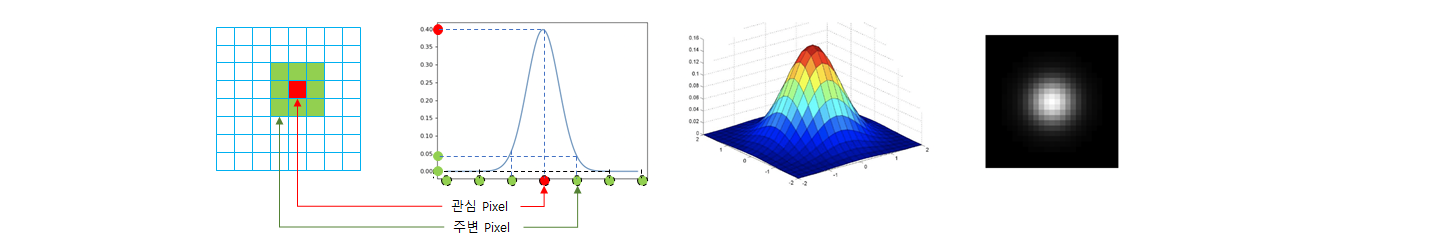

* 2D에서 Gaussian LPF(Low Pass Filter) kernel Spectrum<br>
$ \ \ $ $\checkmark \ $ 저주파 통과 필터는 특정한 차단 주파수 이상 주파수의 신호를 감쇠시켜 차단 주파수 이하의 주파수 신호만 <br> $\quad \ \ $ 통과시키는 필터를 의미<br>
$ \ \ $ $\checkmark \ $ log변환을 사용하여 2D에서 Gaussian kernel의 spectrum을 plotting하는 방법<br>
- signal.gaussian(M, $\sigma$)의 의미<br>
$ \ \ $ $\checkmark \ $ M: output image의 point수<br>
$ \ \ $ $\checkmark \ $ $\sigma$: 표준편차


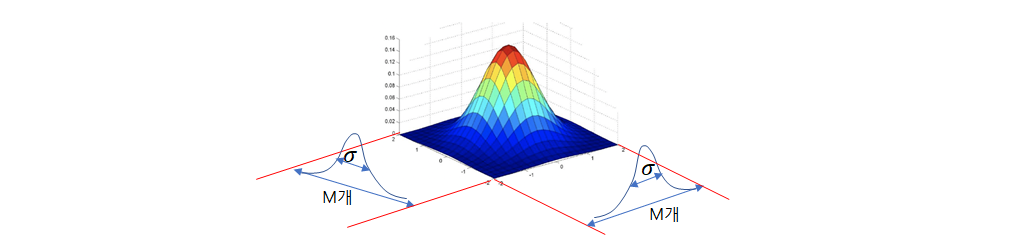

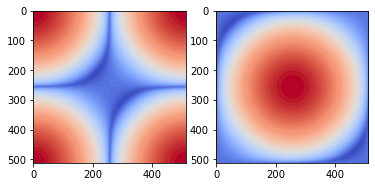

In [18]:
im = rgb2gray(imread('c:/workspace/image/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1),
                                         signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))

# 0.01 is added to keep the argument to log function always positive
plt.figure(figsize=(6,4))
plt.subplot(121),plt.imshow( (20*np.log10( 0.01 +
             freq_kernel)).real.astype(int), cmap='coolwarm') 

plt.subplot(122), plt.imshow( (20*np.log10( 0.01 +
             fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm') 

#plt.colorbar()
plt.show()

* 3D에서 Gaussian LPF kernel Spectrum<br>
$ \ \ $ $\checkmark \ $ 수평면은 주파수면을 나타내고, 수직은 주파수 영역에서 gaussian kernel의 응답을 직접 그리고 대수적으로 <br> $\quad \ \ $ 각각 나타냄

#### scipy signal fftconvolve()을 사용한 Gaussian blur filter 
* scipy signal module의 fftconvolve() 함수를 사용하여 주파수 영역에서 convolution을 실행하는데 사용할 수 있는 방법을 보여줌

(224, 225)
(11, 11)


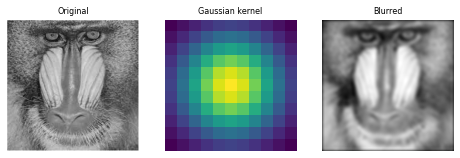

In [19]:
im = np.mean(imread('c:/workspace/image/mandrill.jpg'), axis=2)   # gray image로 변환
print(im.shape)
# (224, 225)

# 2D Gaussian kernel of size 11x11 with σ = 3
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
print(gauss_kernel.shape)
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')

fig, (ax_original, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(8,4))

ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=8)
ax_original.set_axis_off()

ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=8)
ax_kernel.set_axis_off()

ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=8)
ax_blurred.set_axis_off()
plt.show()

* 다음 code는 convolution 후에 원본 영상과 blur영상 spectrum을 표시하는 방법을 나타낸 것임

<ipython-input-20-bab396f8a491>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),cmap=plt.cm.gray)
<ipython-input-20-bab396f8a491>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)


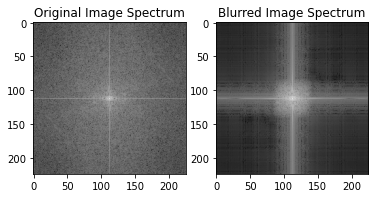

In [20]:
import scipy.fftpack as fftpack

F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),cmap=plt.cm.gray)
plt.title('Original Image Spectrum', size=12)

F1 = fftpack.fft2((im_blurred).astype(float))  # signal.fftconvolve(im, gauss_kernel, mode='same')
F2 = fftpack.fftshift( F1 )

plt.subplot(1,2,2)
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.title('Blurred Image Spectrum', size=12)
plt.show()

* Gaussian blur kernel로 SciPy convolve() 와 fftconvolve()의 runtimes 비교 <br>
$ \ \ $ $\checkmark \ $ 파이썬 timeit module을 사용하여 영상영역과 주파수영역 convolution 함수의 runtime을 비교<br>
$ \ \ $ $\checkmark \ $ 주파수영역의 convolution은 일련의 슬라이딩 윈도우 산술계산 대신에 단일 행렬곱셈을 포함하므로 더 빨라질 <br> $\quad \ \ $ 것으로 예상됨

(224, 225)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]

type(times1) = <class 'list'>
convolve_time = 0.0022914059999999204
fftconvolve_time = 0.0019488429999999291


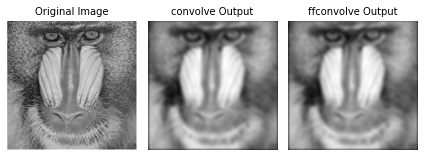

In [21]:
im = np.mean(imread('c:/workspace/image/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)

# 2D Gaussian kernel of size 11x11 with σ = 3
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3))

im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')

#im_blurred1(time domain에서 연산)과 im_blurred2(frequency domain에서 연산)는 
# 다른 domain에서 계산했지만 정확하게 동일한 값임
print(im_blurred1==im_blurred2)  

def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve

wrapped_convolve    = wrapper_convolve(signal.convolve)     # time domain에서 convolution을 실행
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)  # frequency domain에서 convolution을 실행

times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

print('\ntype(times1) = {}'.format(type(times1)))
times1_np = np.array(times1)
times2_np = np.array(times2)
times1_np_mean = np.mean(times1_np)
times2_np_mean = np.mean(times2_np)
print('convolve_time = {}\nfftconvolve_time = {}'.
      format(times1_np_mean, times2_np_mean))

plt.figure(figsize=(6,3))
plt.gray()
plt.subplot(131), plt.imshow(im)
plt.title('Original Image',size=10), plt.axis('off')
plt.subplot(132), plt.imshow(im_blurred1)
plt.title('convolve Output', size=10), plt.axis('off')
plt.subplot(133), plt.imshow(im_blurred2)
plt.title('ffconvolve Output', size=10), plt.axis('off')
plt.tight_layout()

## 4.3  점 기반의 명암변환: 화소변환(pointwise intensive transformation)
* $position: (x, y)$
* 화소값(pixel value): $f(x, y)$
* 화소값의 변환 $g(x, y) = T(f(x, y))$
* 많은 경우 화소값의 변환은 영상처리 파이프라인에서 사전처리단계에 적용됨
<br><br>

### (1)  𝑇(.): 주어진 특정 pixel 의 이웃 N개 pixel에 적용되는 공간연산자
- Image 변환에서 관심 pixel 주위(neighborhood)를 포함하여 같이 처리함
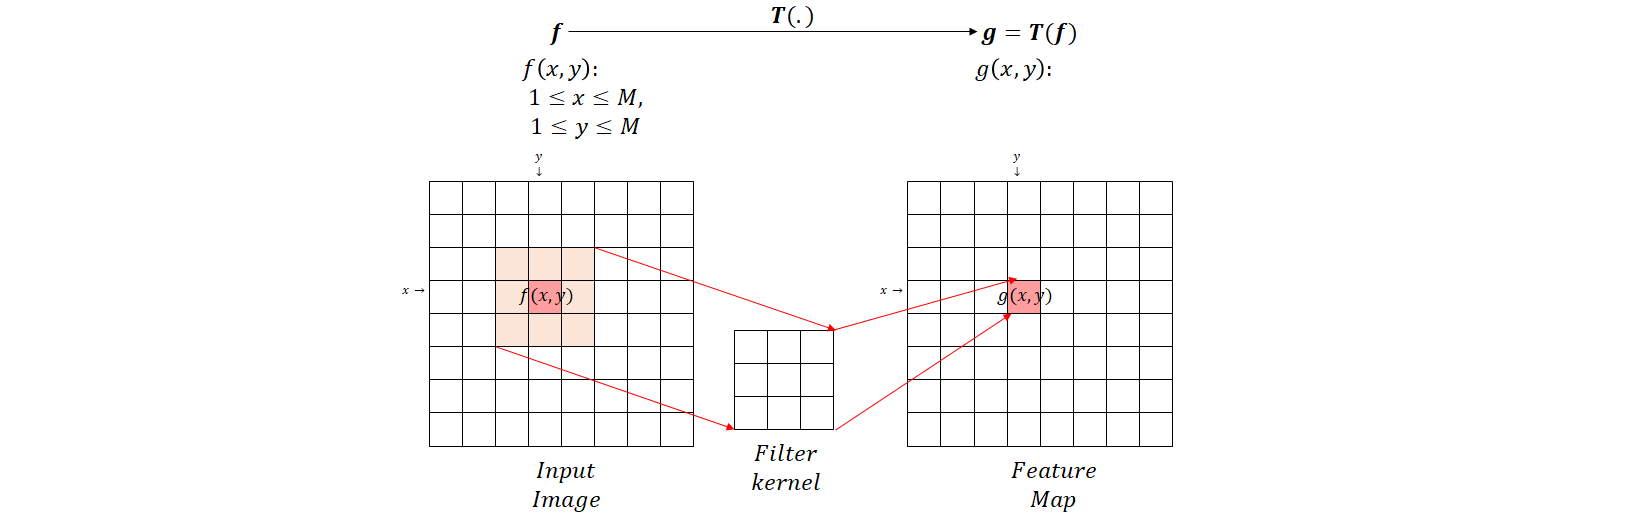

- 공간연산자가 적용되는 주위 pixel을 그림으로 보면 다음과 같음<br>
$ \ \ $ $\checkmark \ $ 관심 pixel 주변pixel들을 보기 위한 여러 방법이 있음


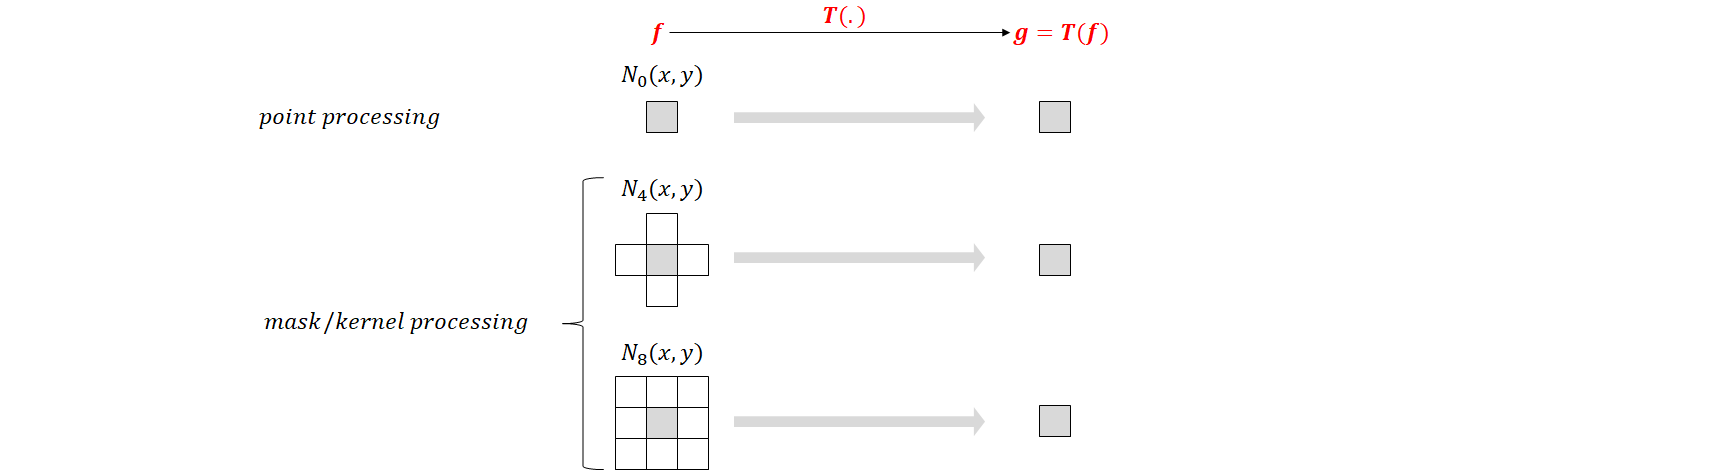

In [22]:
#% matplotlib inline
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
#from skimage.measure import compare_psnr
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pyplot as plt

In [23]:
def plot_image(image, title=''):
    plt.title(title, size=14)
    plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

In [24]:
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)  
    plt.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    plt.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    plt.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.xlabel('pixel value', size=10), plt.ylabel('frequency', size=10)
    plt.title(title, size=12)
    

In [25]:
im = Image.open("c:/workspace/image/parrot.jpg")
im_np = np.array(im)
#im_np.shape, im.size
print(type(im))
im_np.shape, im.size

<class 'PIL.JpegImagePlugin.JpegImageFile'>


((340, 453, 3), (453, 340))

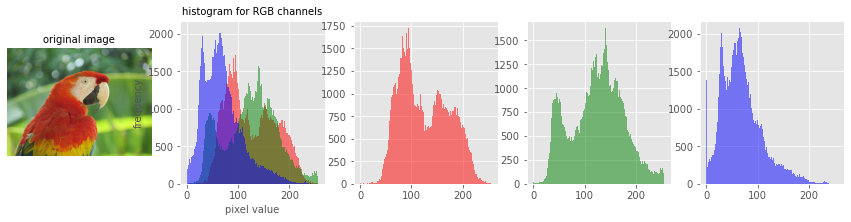

In [26]:
im_r, im_g, im_b = im.split()   # split() 함수는 r, g, b channel 값을 반환하는 함수 
plt.style.use('ggplot')
plt.figure(figsize=(15,3))
plt.subplot(151), plot_image(im), plt.title('original image', size=10)
plt.subplot(152), plot_hist(im_r, im_g, im_b), plt.title('histogram for RGB channels', size=10)
plt.subplot(153), plt.hist(np.array(im_r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
plt.subplot(154), plt.hist(np.array(im_g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
plt.subplot(155), plt.hist(np.array(im_b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
plt.show()

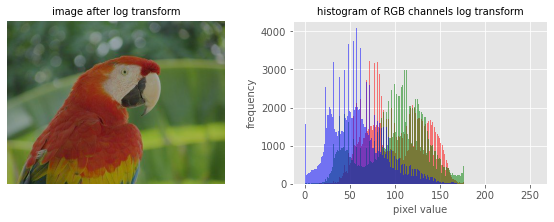

In [27]:
im = im.point(lambda i: 255*np.log(1+i/255)) # Image.point() 메서드를 사용하여 픽셀 데이터 조작
                                              # Image (참고자료) 참조
im_r, im_g, im_b = im.split()
plt.style.use('ggplot')
plt.figure(figsize=(10,3))
plt.subplot(121), plot_image(im)
plt.title('image after log transform', size=10)
plt.subplot(122), plot_hist(im_r, im_g, im_b)
plt.title('histogram of RGB channels log transform',size=10)
plt.show()